In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [16]:
from helpers import load_data

# load dataset
x, y = load_data()

In [17]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [18]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    # Split data
    x_test = x[k_indices[k]]
    y_test = y[k_indices[k]]
    
    x_train = x[~np.isin(x,x_test)]
    y_train = y[~np.isin(y,y_test)]
    
    # Build polynomial
    x_train_poly = build_poly(x_train,degree)
    x_test_poly = build_poly(x_test,degree)
    
    w = ridge_regression(y_train,x_train_poly,lambda_)
  
    
    loss_tr = compute_mse(y_train,x_train_poly,w)
    loss_te = compute_mse(y_test,x_test_poly,w)
    
    
    return loss_tr, loss_te

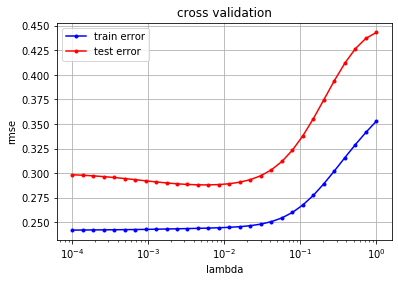

In [19]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for lambda_ in lambdas:
        # losses 
        loss_tr = 0
        loss_te = 0
        for k in range(k_fold):
            loss_tr_k, loss_te_k = cross_validation(y,x,k_indices,k,lambda_,degree)
            loss_tr += loss_tr_k/k_fold
            loss_te += loss_te_k/k_fold
            
        rmse_tr.append(np.sqrt(2*loss_tr))
        rmse_te.append(np.sqrt(2*loss_te))
    
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

In [24]:
def best_degree_selection(degrees, k_fold, lambdas, seed = 1):
    # split data in k fold 
    k_indices = build_k_indices(y,k_fold,seed)
   
    # for each degree, we compute the best lambdas and the associated rmse
    best_lambdas = []
    best_rmses = []
    
    for degree in degrees:
        
        loss_te=0
        
        rmse_te = []
        for lambda_ in lambdas:
            # losses
            loss_te = 0
            
            for k in range(k_fold):
                _, loss_te_k = cross_validation(y,x,k_indices,k,lambda_,degree)
                loss_te += loss_te_k/k_fold
            
            rmse_te.append(np.sqrt(2*loss_te))
    
        best_lambda_index = np.argmin(rmse_te)
        best_lambdas.append(lambdas[best_lambda_index])
        best_rmses.append(rmse_te[best_lambda_index])
    
    best_degree_index = np.argmin(best_rmses)
    
    return degrees[best_degree_index]

best_degree_selection(np.arange(2,11), 4, np.logspace(-4, 0, 30))

7

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

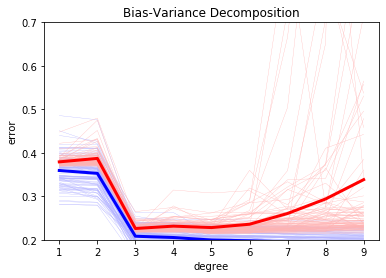

In [33]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_train, y_train, x_test, y_test  = split_data(x,y,ratio_train,seed)
        
        for index_degree,degree in enumerate(degrees):
            
            x_train_poly = build_poly(x_train,degree)
            x_test_poly = build_poly(x_test,degree)
        
            loss_tr, w = least_squares(y_train,x_train_poly)
            loss_test = compute_mse(y_test,x_test_poly,w)
            
            rmse_tr[index_seed,index_degree] = np.sqrt(2 * loss_tr)
            rmse_te[index_seed,index_degree] = np.sqrt(2 * loss_test)
        
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()